In [38]:
import numpy as np
import matplotlib.pyplot as plt

PINNs_Bayes = np.load("pinn_bayes_solutions_0_50_k_0.9_1.npy")
FDM_Bayes = np.load("FDM_0-50_0.9_1.npy")
observations = np.load("Obs_doublewell_k_0.9.npy")
observation_times = np.load("Obs_time_doublewell_k_0.9.npy")
true_trajectory = np.load("true_trajectory_k_0.9_1.npy")
n_steps = 101
N1 = 401
N2 = 1024
L = 2
dt = 0.01
x = np.linspace(-L, L, N1)
x1 = np.linspace(-L, L, N2)
time_steps = np.linspace(0, dt * PINNs_Bayes.shape[1], PINNs_Bayes.shape[1])
PINNs_Bayes_modes = x[np.argmax(PINNs_Bayes, axis=0)]

FDM_Bayes_modes = x1[np.argmax(FDM_Bayes, axis=0)]

cdf = np.cumsum(all_predictions, axis=0)
cdf /= cdf[-1, :]

lower_idx = np.argmax(cdf >= 0.16, axis=0)
upper_idx = np.argmax(cdf >= 0.84, axis=0)

lower_bounds = x[lower_idx]
upper_bounds = x[upper_idx]

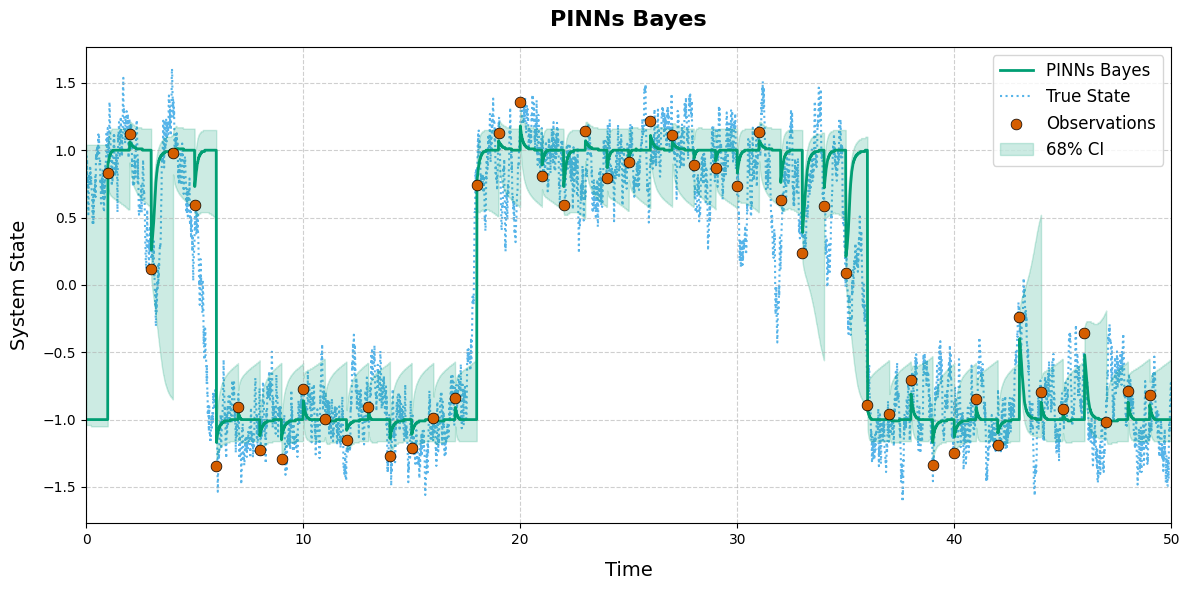

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(time_steps, PINNs_Bayes_modes, label="PINNs Bayes", color="#009E73", linewidth=2)
plt.plot(time_steps[:5000], true_trajectory[:5000], label="True State", color="#56B4E9", linestyle=":", linewidth=1.5, zorder=1)
plt.scatter(observation_times[1:50], observations[1:50], label="Observations", color="#D55E00", marker="o", s=60, edgecolors="black", linewidths=0.5, zorder=2)
plt.fill_between(time_steps, lower_bounds, upper_bounds, color="#009E73", alpha=0.2, label="68% CI")

plt.xlabel("Time", fontsize=14, labelpad=10)
plt.ylabel("System State", fontsize=14, labelpad=10)
plt.title("PINNs Bayes", fontsize=16, fontweight="bold", pad=15)
plt.legend(fontsize=12, loc="upper right", frameon=True)
plt.xlim(0, 50)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("PINNs_Bayes_vs_True_vs_Obs_IC.png", dpi=300, bbox_inches="tight")
plt.show()

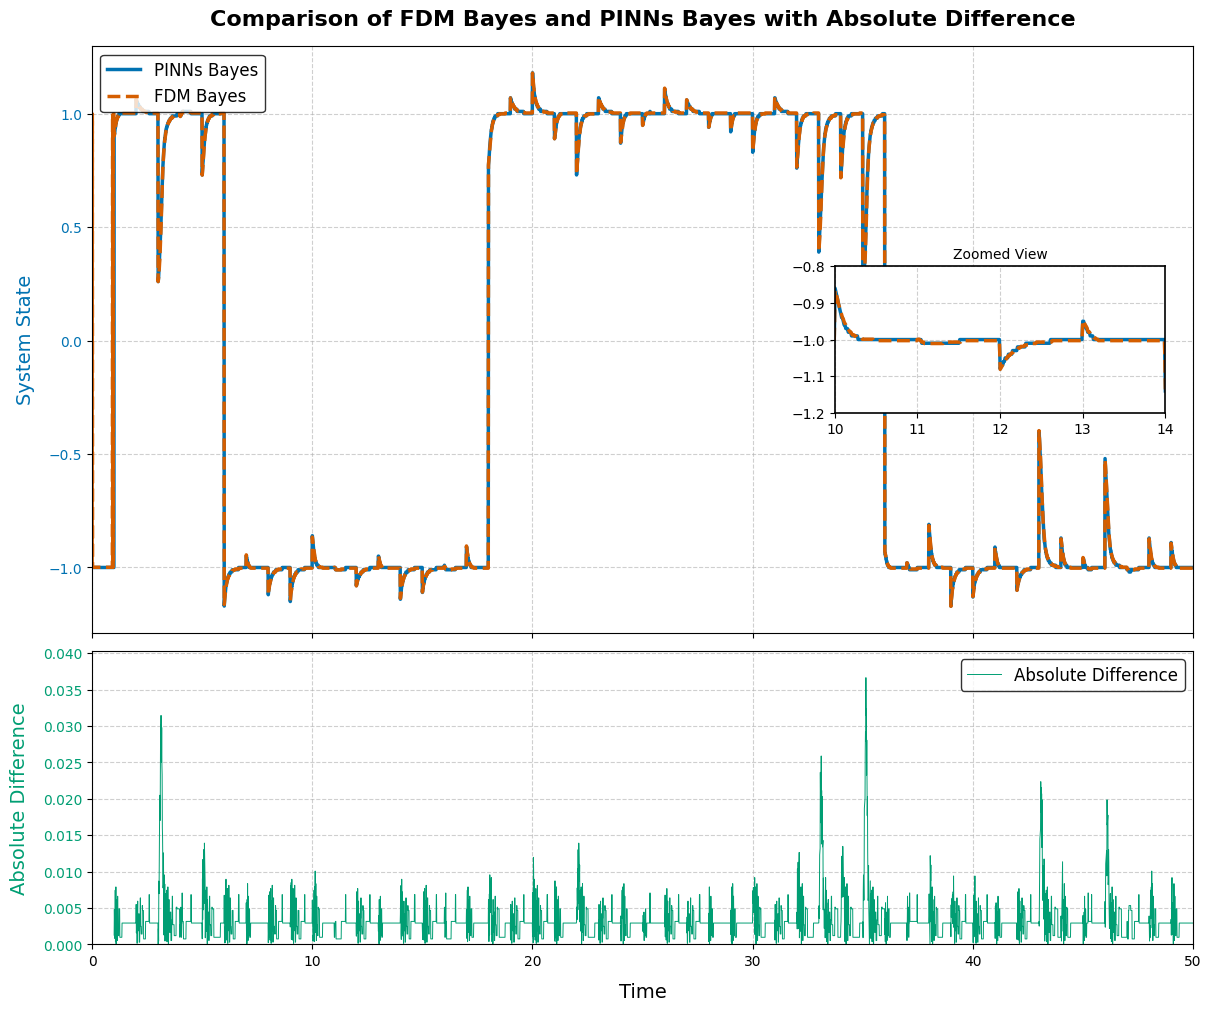

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

t = 100
abs_diff = np.abs(PINNs_Bayes_modes[t::] - FDM_Bayes_modes[t::])

fig, (ax_main, ax_diff) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]}, sharex=True, constrained_layout=True)

# Top plot: Comparison of FDM Bayes and PINNs Bayes
ax_main.plot(time_steps, PINNs_Bayes_modes, label="PINNs Bayes", color="#0072B2", linestyle="-", linewidth=2.5)
ax_main.plot(time_steps, FDM_Bayes_modes, label="FDM Bayes", color="#D55E00", linestyle="--", linewidth=2.5)
ax_main.set_ylabel("System State", fontsize=14, labelpad=10, color="#0072B2")
ax_main.tick_params(axis="y", labelcolor="#0072B2")
ax_main.set_title(r"Comparison of FDM Bayes and PINNs Bayes with Absolute Difference", fontsize=16, fontweight="bold", pad=15)
ax_main.legend(loc="upper left", fontsize=12, frameon=True, edgecolor="black")
ax_main.grid(visible=True, linestyle="--", alpha=0.6)
ax_main.set_xlim(0, 50)

ax_inset = inset_axes(ax_main, width="30%", height="25%", loc="center right", borderpad=2)
zoom_start, zoom_end = 10, 14
ax_inset.plot(time_steps, PINNs_Bayes_modes, color="#0072B2", linestyle="-", linewidth=2.5)
ax_inset.plot(time_steps, FDM_Bayes_modes, color="#D55E00", linestyle="--", linewidth=2.5)
ax_inset.set_xlim(zoom_start, zoom_end)
ax_inset.set_ylim(-1.2, -0.8)
ax_inset.set_title("Zoomed View", fontsize=10)
ax_inset.grid(visible=True, linestyle="--", alpha=0.6)
ax_inset.set_frame_on(True)
for spine in ax_inset.spines.values():
    spine.set_color("black")
    spine.set_linewidth(1.2)

# Bottom plot: Absolute Difference
ax_diff.plot(time_steps[t::], abs_diff, label="Absolute Difference", color="#009E73", linewidth=0.7)
ax_diff.set_xlabel("Time", fontsize=14, labelpad=10)
ax_diff.set_ylabel("Absolute Difference", fontsize=14, labelpad=10, color="#009E73")
ax_diff.tick_params(axis="y", labelcolor="#009E73")
ax_diff.legend(loc="upper right", fontsize=12, frameon=True, edgecolor="black")
ax_diff.grid(visible=True, linestyle="--", alpha=0.6)
ax_diff.set_ylim(0, max(abs_diff) * 1.1)

plt.savefig("Combined_PINNs_FDM_AbsDiff_Below.png", dpi=300, bbox_inches="tight")
plt.show()